In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
%matplotlib inline

data = pd.read_csv('breast-cancer-wisconsin.data', header=None)

# pd.options.display.max_columns = 100

data.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
data['Class'] = data['Class'].map({4:1, 2:0})
data2 = data.reset_index()

In [15]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,0.344778
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.475636
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


Text(0.5,1,'Class 1 = Malignant, 0 = Benign')

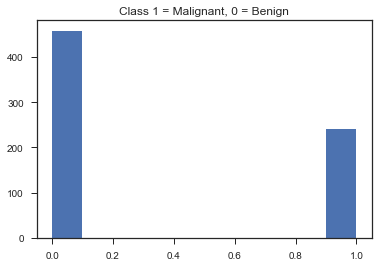

In [16]:
plt.hist(data['Class'])
plt.title('Class 1 = Malignant, 0 = Benign')

Seems like there are more cases of benign cancer cells than malignant

c:\users\tiani\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


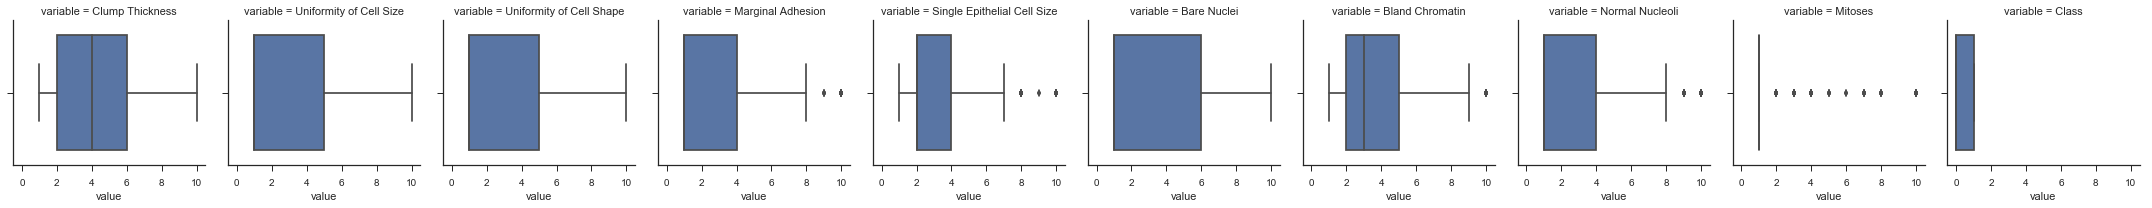

                   Bland Chromatin                                            \
                             count  mean       std   min    25%   50%    75%   
Sample code number                                                             
61634                          1.0   2.0       NaN   2.0   2.00   2.0   2.00   
63375                          1.0   7.0       NaN   7.0   7.00   7.0   7.00   
76389                          1.0   6.0       NaN   6.0   6.00   6.0   6.00   
95719                          1.0   7.0       NaN   7.0   7.00   7.0   7.00   
128059                         1.0   5.0       NaN   5.0   5.00   5.0   5.00   
142932                         1.0   9.0       NaN   9.0   9.00   9.0   9.00   
144888                         1.0   7.0       NaN   7.0   7.00   7.0   7.00   
145447                         1.0   3.0       NaN   3.0   3.00   3.0   3.00   
160296                         1.0   8.0       NaN   8.0   8.00   8.0   8.00   
167528                         1.0   3.0

KeyError: 'Mitosis'

In [33]:
import seaborn as sns
# plot all variables with a box plot
data1 = data.copy()
data1
data1 = pd.melt(data1, id_vars=['Sample code number'])
data1['value'] = data1['value'].replace('?', np.nan)
data1 = data1.dropna()
data1.value.unique()
data1['value'] = data1['value'].astype(float)

graph = sns.FacetGrid(data1, col='variable')
graph = graph.map(sns.boxplot, 'value')
plt.show()

# descriptive stats by Class of Cancer
print(data.groupby('Sample code number').describe())

# test whether grp differences are significant using ttest
for col in data.loc[:,'Clump Thickness':'Mitosis'].columns:
    print(col)
    print(stats.ttest_ind(
        data[data['Class'] == 1][col].dropna(),
        data[data['Class'] == 0][col].dropna()
    ))

In [5]:
data2.columns

Index(['index', 'Sample code number', 'Clump Thickness',
       'Uniformity of Cell Size', 'Uniformity of Cell Shape',
       'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
       'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [6]:
df_melt = pd.melt(data2, id_vars=['index', 'Sample code number'])
df_melt_group = df_melt.groupby(['variable', 'value'])['Sample code number'].mean().reset_index()

In [7]:
df_melt_group

,variable,value,Class
0,Bare Nuclei,1,0.037313
1,Bare Nuclei,10,0.977273
2,Bare Nuclei,2,0.300000
3,Bare Nuclei,3,0.500000
4,Bare Nuclei,4,0.684211
5,Bare Nuclei,5,0.666667
6,Bare Nuclei,6,1.000000
7,Bare Nuclei,7,0.875000
8,Bare Nuclei,8,0.904762
9,Bare Nuclei,9,1.000000


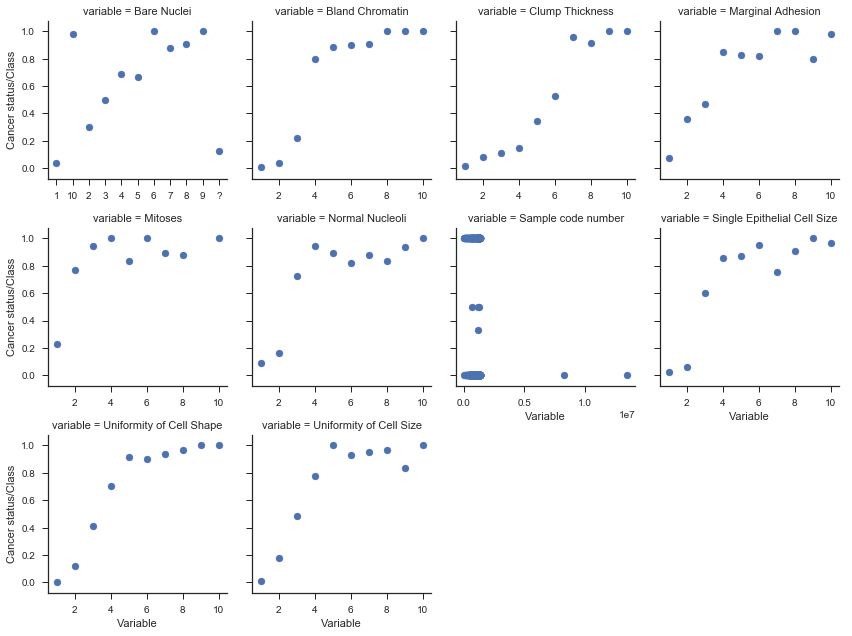

In [8]:
import seaborn as sns
# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic

g = sns.FacetGrid(df_melt_group, col="variable", col_wrap=4, sharex=False) 
g = g.map(plt.scatter, "value", "Class")
g.set_ylabels("Cancer status/Class")
g.set_xlabels("Variable")



plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'figure'

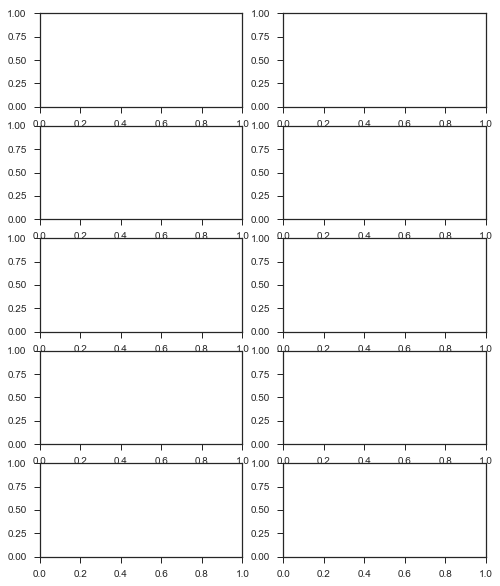

In [34]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize = (8,10))
axes = axes.ravel()
axes.figure(alpha=0.5, stacked=True, normed=True, label=['1', '0'], color=['r', 'g'])
axes.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [35]:
traindf, testdf = train_test_split(data1, test_size = 0.2)
#set variables
X = data1.loc[:, ~data1.columns.isin(['Class'])]
Y = data1['Class']
X

KeyError: 'Class'

In [ ]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X, Y)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(X)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (Y != y_pred).sum()
))

In [10]:
from sklearn import ensemble

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, Y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(Y_train, predict_train, margins=True)
table_test = pd.crosstab(Y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All', 1]
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All', 0]

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All', 1]
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All', 0]

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

NameError: name 'X_train' is not defined

In [11]:
table_test

NameError: name 'table_test' is not defined

In [ ]:
# import sv classifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC()
cross_val_score(svc, X, Y, cv=5)

In [ ]:
# Iterate through decision trees, each time using the residuals
# from the previous tree as the inputs.
from sklearn import tree
uniquex = data1['Class'].unique()

# Store values from loops.
preds = pd.DataFrame()
labels = []

for m in range(0, 101):

    # Initialize and fit the tree. Set the max depth to 3.
    decision_tree = tree.DecisionTreeRegressor(max_depth=3)
    decision_tree.fit(X, Y)

    # Get and store predicted values.
    pred = decision_tree.predict(X)
    preds['pred{}'.format(m)] = pred

    # Residuals.
    Y = Y - pred

    # Output every 20 iterations.
    if m % 20 == 0:
        print('Weak learner {} R^2: {}'.format(m, decision_tree.score(X, Y)))
        labels = labels + [m]
        bestpred = preds.sum(axis=1)
        plt.plot(uniquex, np.poly1d(np.polyfit(
            data1['Class'], bestpred, 1))(uniquex))

plt.legend(labels)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()
predicted = preds.sum(axis=1)

print('Overall R^2:')
print(np.corrcoef(data1['Class'], predicted)[0, 1])